The project analyzes a heart disease dataset to explore relationships between patient health metrics (like age, blood pressure, cholesterol, etc.) and the presence of heart disease.
Through visualizations and statistical insights, the goal is to identify key risk indicators and understand patterns influencing heart disease.

In [1]:

# 🩺 HEART DISEASE EXPLORATORY DATA ANALYSIS (EDA)
# 1️⃣ Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

In [4]:
# 2️⃣ Load Dataset
df = pd.read_csv("/content/heart-disease.csv")

In [5]:
print("Dataset Shape:", df.shape)

Dataset Shape: (303, 14)


In [6]:
print("\nData Types:\n", df.dtypes)


Data Types:
 age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [7]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [8]:
print("\nStatistical Summary:\n", df.describe())


Statistical Summary:
               age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std 

💡 Insight:
The dataset contains 303 records and 14 columns.
 There are no missing values, making it clean for analysis.

/tmp/ipython-input-3320926855.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='target', palette='pastel')


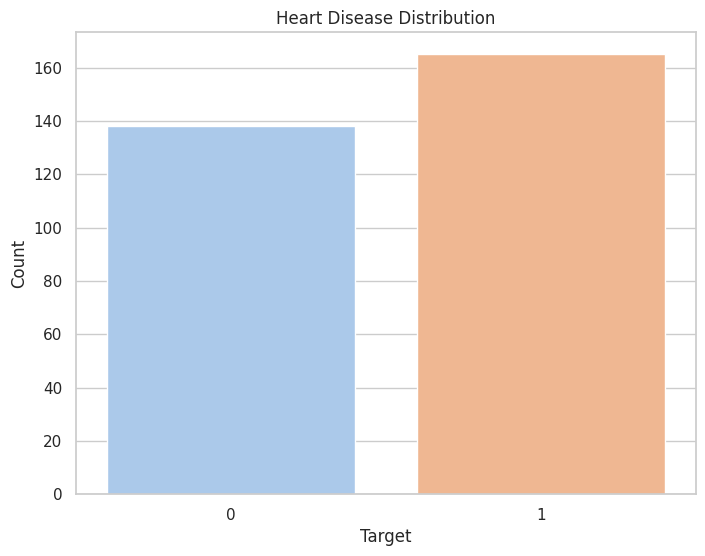

In [10]:
# 3️⃣ Target Distribution (Heart Disease Presence)
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='target', palette='pastel')
plt.title('Heart Disease Distribution')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

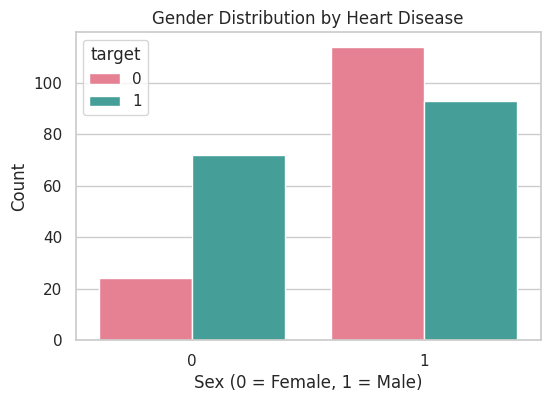

In [11]:
# 4️⃣ Gender Distribution by Heart Disease

plt.figure(figsize=(6,4))
sns.countplot(x='sex', hue='target', data=df, palette='husl')
plt.title('Gender Distribution by Heart Disease')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.show()


 💡 Insight:
Males are more represented in the dataset and show higher heart disease prevalen

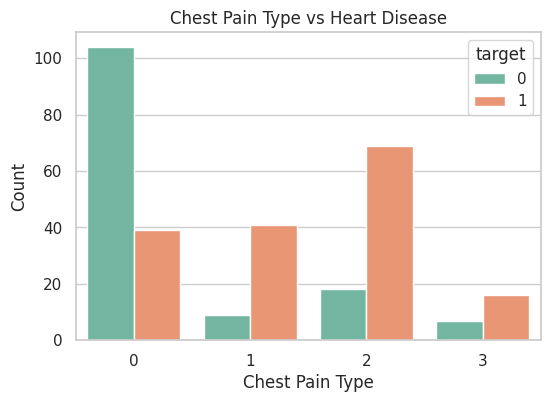

In [12]:
# 5️⃣ Chest Pain Type vs Heart Disease
plt.figure(figsize=(6,4))
sns.countplot(x='cp', hue='target', data=df, palette='Set2')
plt.title('Chest Pain Type vs Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()

💡 Insight:
 Chest pain types 1 and 2 are strongly associated with heart disease.
 cp = 0 (typical angina) usually shows lower risk.

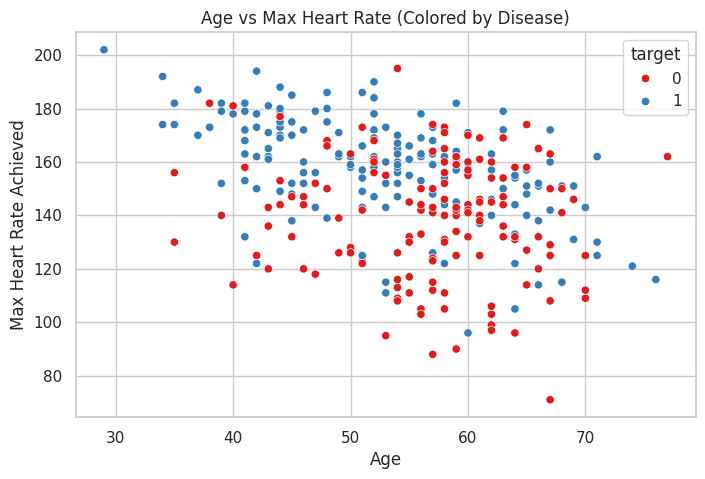

In [13]:
# 6️⃣ Age vs Maximum Heart Rate
plt.figure(figsize=(8,5))
sns.scatterplot(x='age', y='thalach', hue='target', data=df, palette='Set1', edgecolor='w')
plt.title('Age vs Max Heart Rate (Colored by Disease)')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate Achieved')
plt.show()

💡 Insight:
 Younger individuals reach higher heart rates.
Patients with lower max heart rate (around 100–130) tend to have heart disease.

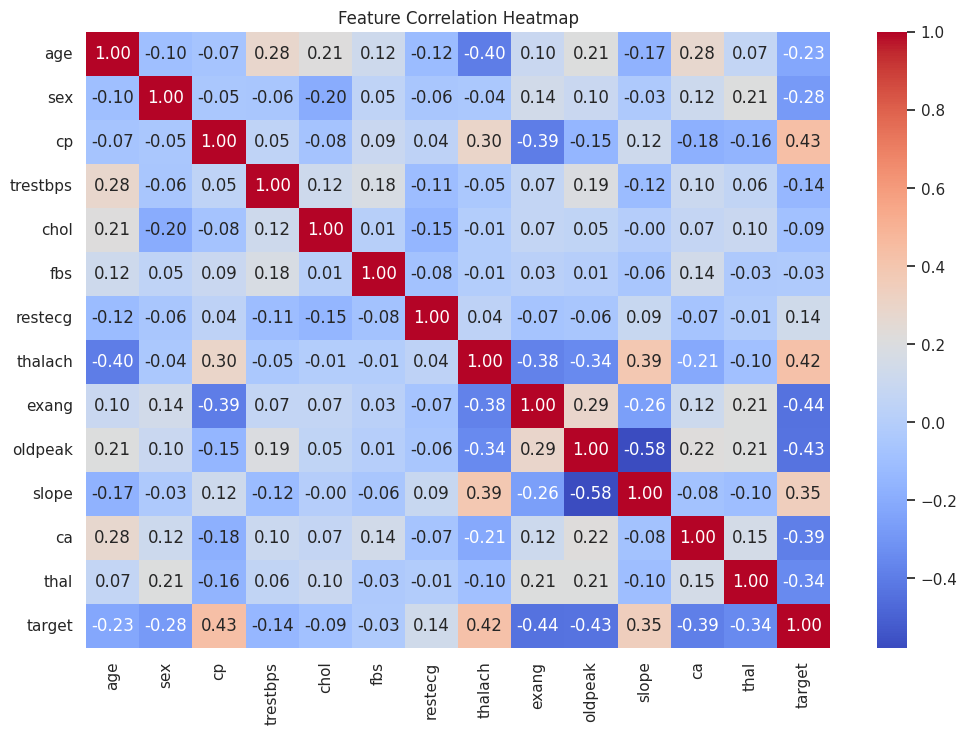

In [14]:
# 7️⃣ Correlation Heatmap

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

💡 Insight:
cp (chest pain), thalach (max heart rate), and slope show positive correlation with target. oldpeak, ca, and thal have negative correlation — important for prediction

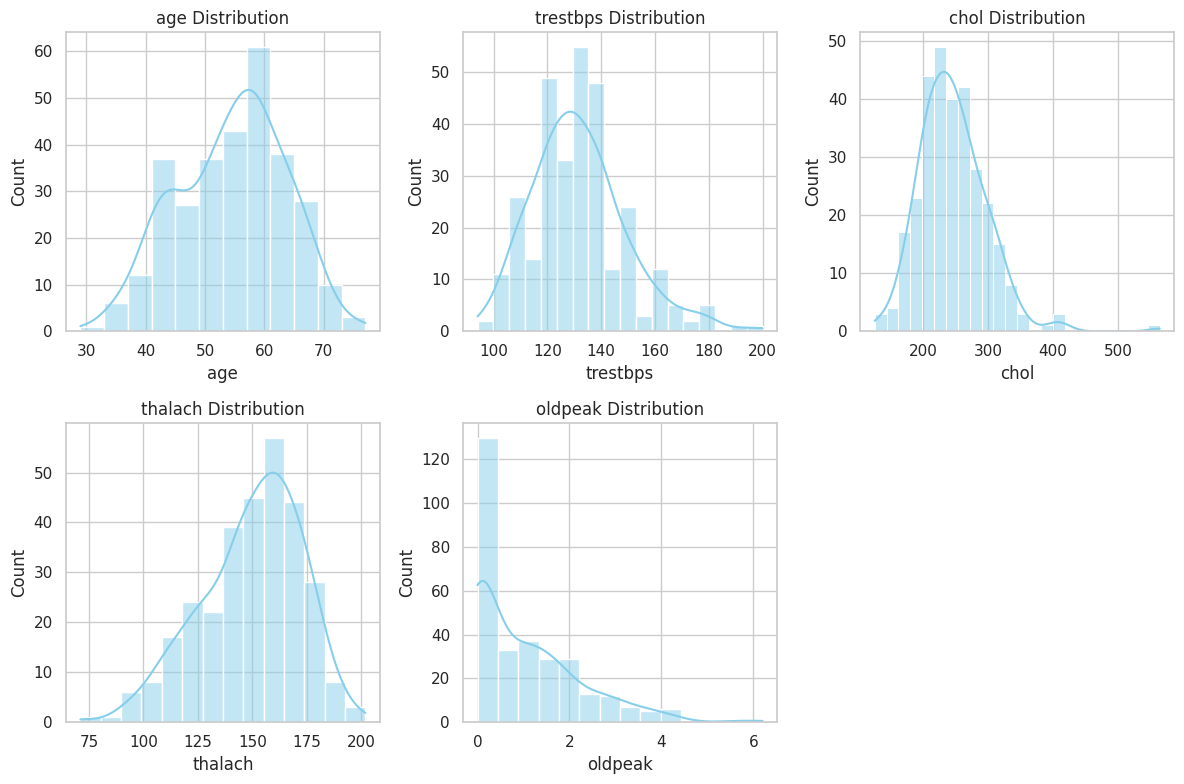

In [15]:
# 8️⃣ Distribution of Key Numerical Features

numeric_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
plt.figure(figsize=(12,8))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], kde=True, color='skyblue')
    plt.title(f'{feature} Distribution')
plt.tight_layout()
plt.show()

 💡 Insight:
- Age: Concentrated around 45–60 years.
 - trestbps: Slightly right-skewed — few patients with very high BP.
 - chol: Wide spread — some extremely high cholesterol values.
 - thalach: Most patients have 130–170 bpm.
 - oldpeak: Majority near 0–2 — but higher oldpeak values indicate severe heart

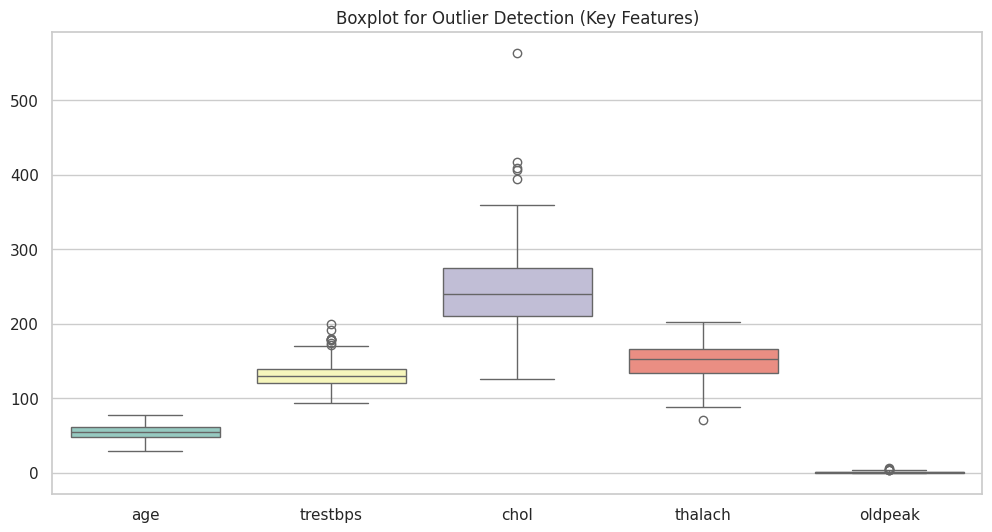

In [16]:
# 9️⃣ Boxplots for Outlier Detection
plt.figure(figsize=(12,6))
sns.boxplot(data=df[numeric_features], palette='Set3')
plt.title('Boxplot for Outlier Detection (Key Features)')
plt.show()

💡 Insight:
 Cholesterol and resting BP show mild outliers — typical in medical data. These values could represent high-risk patients.


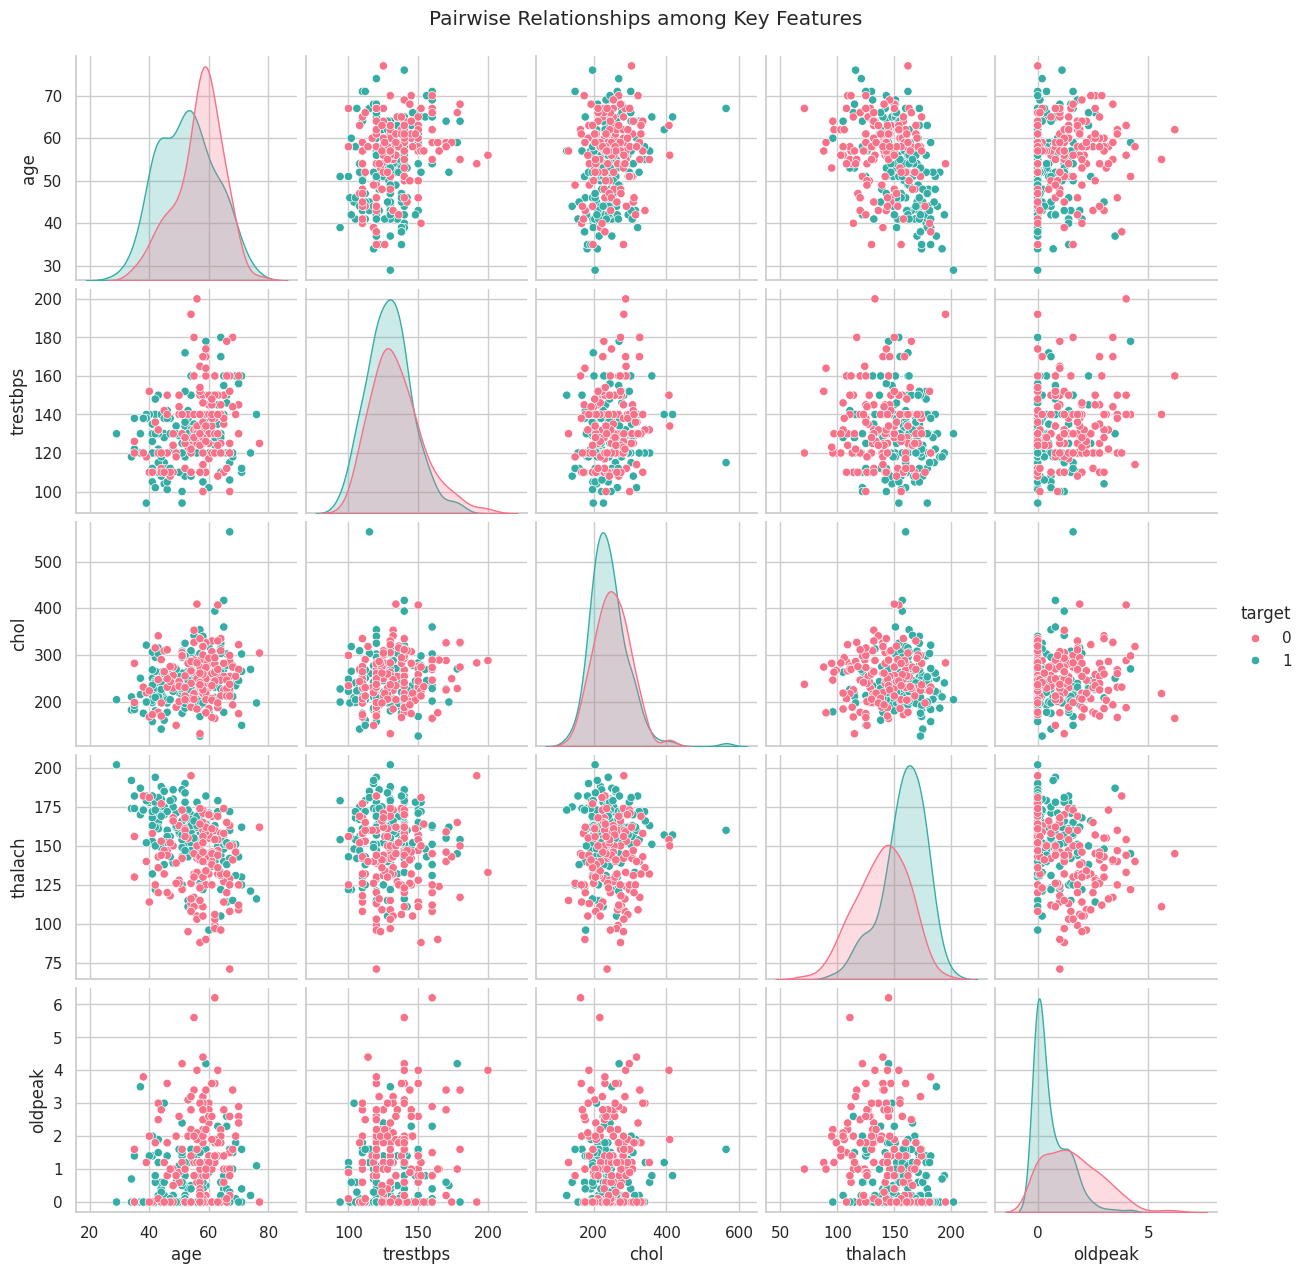

In [17]:
#🔟 Pairplot for Relationships among Features
sns.pairplot(df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']], hue='target', palette='husl')
plt.suptitle('Pairwise Relationships among Key Features', y=1.02)
plt.show()

💡 Insight:
 - Visualizes multi-feature interaction:
- Patients with higher cholesterol & lower thalach more likely to have disease.
 - age + oldpeak combination also indicates risk tendency.

In [18]:
#✅ FINAL INSIGHTS SUMMARY

print("\n🩺 Final Insights Summary:")
print("- Dataset is clean (no missing values).")
print("- Around 55% patients have heart disease.")
print("- Key influencing factors: chest pain type (cp), max heart rate (thalach), ST depression (oldpeak), and thal.")
print("- Males show higher heart disease prevalence.")
print("- Age group 45–60 is at greater risk.")
print("- Correlation suggests cp and thalach are positively linked with disease, while oldpeak and ca are negatively linked.")


🩺 Final Insights Summary:
- Dataset is clean (no missing values).
- Around 55% patients have heart disease.
- Key influencing factors: chest pain type (cp), max heart rate (thalach), ST depression (oldpeak), and thal.
- Males show higher heart disease prevalence.
- Age group 45–60 is at greater risk.
- Correlation suggests cp and thalach are positively linked with disease, while oldpeak and ca are negatively linked.
